In [55]:
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from skimage import io
import math
from PIL import Image
import matplotlib.patches as patches

warnings.filterwarnings('ignore')
from skimage.color import rgb2gray

**NCC**

In [2]:
def compute_NCC(temp2,temp,rtempmean,gtempmean,btempmean,rtempstd,gtempstd,btempstd):
    rpatmean = np.mean(temp2[:,:,0])
    gpatmean = np.mean(temp2[:,:,1])
    bpatmean = np.mean(temp2[:,:,2])
    rpatstd = np.std(temp2[:,:,0])
    gpatstd = np.std(temp2[:,:,1])
    bpatstd = np.std(temp2[:,:,2])
    n1 = 0
    n2 = 0
    n3 = 0
    tempr,tempc,ch=temp2.shape
    for k in range(tempr):
        for l in range(tempc):
            n1 = n1 + ((temp2[k,l,0]-rpatmean)*(temp[k,l,0]-rtempmean)/(rpatstd*rtempstd));
            n2 = n2 + ((temp2[k,l,1]-gpatmean)*(temp[k,l,1]-gtempmean)/(gpatstd*gtempstd));
            n3 = n3 + ((temp2[k,l,2]-bpatmean)*(temp[k,l,2]-btempmean)/(bpatstd*btempstd));
    return [n1,n2,n3]

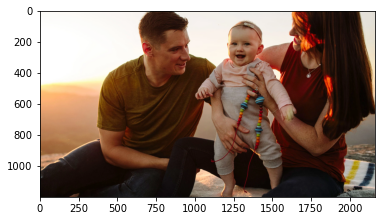

(1200, 2160, 3)


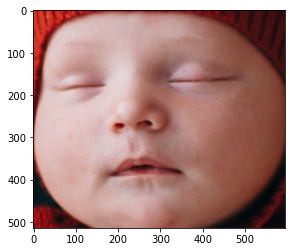

(514, 594, 3)


In [60]:
searchImage = io.imread('input3.png')
#searchImage=rgb2gray(searchImage)
templateImage = io.imread('babytemplate.png')
#templateImage=cv2.flip(templateImage,1)
#templateImage=rgb2gray(templateImage)
plt.subplot(1,1,1)
plt.imshow(searchImage)
plt.show()
print(searchImage.shape)

plt.subplot(1,1,1)
plt.imshow(templateImage)
plt.show()
print(templateImage.shape)

In [61]:
#downsize the images
templateImage = templateImage[0::2,0::2]
templateImage = templateImage[0::2,0::2]
templateImage = templateImage[0::2,0::2]


searchImage = searchImage[0::2,0::2]
searchImage = searchImage[0::2,0::2]
searchImage = searchImage[0::2,0::2]

print(searchImage.shape)
print(templateImage.shape)

nrowtemp,ncoltemp,ch=searchImage.shape
nrows,ncols,ch=templateImage.shape
nc1=np.zeros((nrowtemp-nrows,ncoltemp-ncols))
nc2=np.zeros((nrowtemp-nrows,ncoltemp-ncols))
nc3=np.zeros((nrowtemp,ncoltemp))
rtempmean = np.mean(searchImage[:,:,0])
gtempmean = np.mean(searchImage[:,:,1])
btempmean = np.mean(searchImage[:,:,2])
rtempstd = np.std(searchImage[:,:,0])
gtempstd = np.std(searchImage[:,:,1])
btempstd = np.std(searchImage[:,:,2])
for i in range(nrows//2,nrowtemp-nrows//2):
    for j in range(ncols//2,ncoltemp-ncols//2):
        temp2=templateImage[i-nrowtemp//2:i+nrowtemp//2+1,j-ncoltemp//2:j+ncoltemp//2+1,:]
        nc1[i-nrows//2 - 1,j-ncols//2],nc2[i-nrows//2 - 1,j-ncols//2],nc3[i-nrows//2 - 1,j-ncols//2]=compute_NCC(temp2,searchImage,rtempmean,gtempmean,btempmean,rtempstd,gtempstd,btempstd)


(150, 270, 3)
(65, 75, 3)


IndexError: index 195 is out of bounds for axis 1 with size 195

**Compute NCC**

In [47]:
NCC=np.zeros((nrowtemp-nrows,ncoltemp-ncols))
for i in range(nrowtemp-nrows):
    for j in range(ncoltemp-ncols):
        NCC[i,j]=1/(nrows*ncols)*(nc1[i,j]+nc2[i,j]+nc3[i,j])
NCC=NCC/3

In [48]:
print(NCC.shape)

(125, 246)


In [49]:
array = NCC.flatten()

In [50]:
print(array.shape)

(30750,)


In [51]:
print(np.argmax(array))

15128


In [52]:
flattenIndex = np.argmax(array)
row = int(flattenIndex / (searchImage.shape[1] - templateImage.shape[1]))
column = flattenIndex % (searchImage.shape[0] - templateImage.shape[0])
print(row,column)

61 3


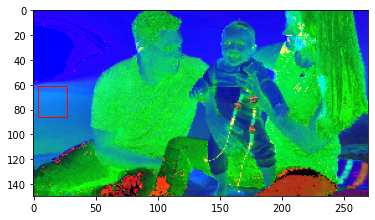

In [53]:
#14,31

fig,ax = plt.subplots()
ax.imshow(searchImage)
rect = patches.Rectangle((column,row),templateImage.shape[1],templateImage.shape[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()